In [17]:
import numpy as np 

In [18]:
a = np.array([10, 10, 10, 10, 10, 10, 10])
print("std = {}, mean = {}".format(a.std(), a.mean()))

std = 0.0, mean = 10.0


People often think of the __mean__ as describing the data, and it does, but it's only when combined with the __standard deviation__ that we know how much the numbers differ from one another. 

In this case, they're all identical, so the standard deviation is 0.

In [19]:
a = np.array([5,15,0,20,-5,25,10])
print("std = {}, mean = {}".format(a.std(), a.mean()))

std = 10.0, mean = 10.0


Here, the __mean__ has not changed, but the __standard deviation__ has. 

We can see, from just those two numbers, that although the numbers remain centered around 10, they also are spread out quite a bit.

One simple way to detect unusual data is to look for all of the values that lie outside of 2 standard deviations from the mean, which accounts for about 95% of the data. 

We can go further out if we want; 99.73% of data points are within 3 standard deviations, and 99.994% are within four.

If we're looking for outliers in an existing data set, we can do something like this:

In [20]:
a = np.array([-5,15,0,20,-5,25,1000])

In [21]:
print(a.std())

347.19282415231044


In [22]:
min_cutoff = a.mean() - a.std()*2
max_cutoff = a.mean() + a.std()*2

In [23]:
print(a[(a<min_cutoff) | (a>max_cutoff)])

[1000]


So if a new data comes...

In [24]:
new_data = np.array([-5000, -3000, -1000, -500, 20, 60, 500, 800, 900])
print(new_data[(new_data < min_cutoff) | (new_data > max_cutoff)])

[-5000 -3000 -1000   900]


- You're unlikely to be looking at a single-dimensional vector for outliers. 

- The baseline (mean) is likely to shift over time. 

Hence there must be other, better ways to measure whether something is "inside" or "outside", 

## Outlier detection

In [25]:
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn import datasets

In [26]:
boston = datasets.load_boston()

In [27]:
# print(boston.DESCR)

In [28]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [29]:
np.set_printoptions(suppress=True, edgeitems=25, threshold=30)

In [30]:
len(boston.data)

506

In [31]:
X = boston.data
y = boston.target

columns = boston.feature_names

In [32]:
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [33]:
# create the dataframe
boston_df = pd.DataFrame(boston.data)

boston_df.columns = columns

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Features/independent variable will be used to look for any outlier. 

# Discover outliers

## Box plot-

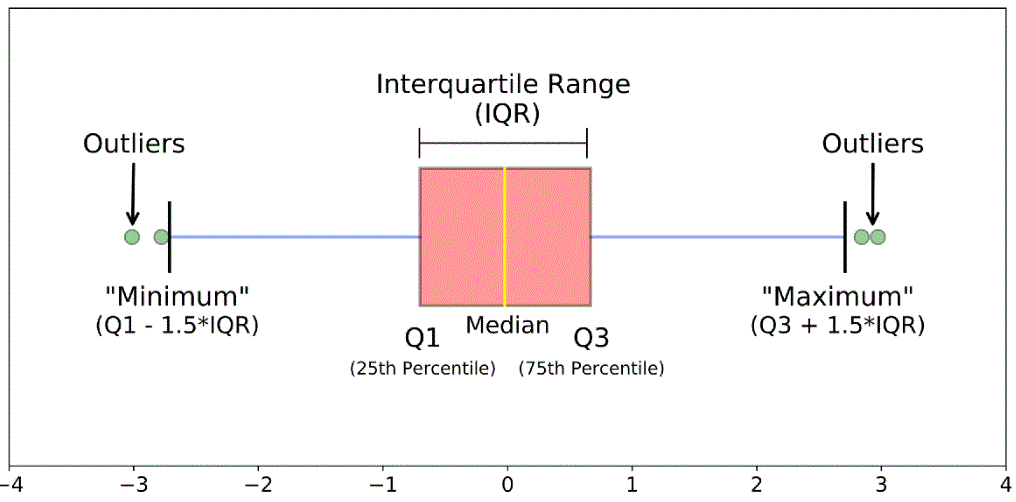

- 5 number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

    - median (Q2/50th Percentile): the middle value of the dataset.

    - 1st quartile (Q1/25th Percentile): the middle number between the smallest number (not the “minimum”) and the median of the dataset.

    - 3rd quartile (Q3/75th Percentile): the middle value between the median and the highest value (not the “maximum”) of the dataset.

    - interquartile range (IQR): 25th to the 75th percentile.

    - whiskers (shown in blue)

    - **outliers** (shown as green circles)

    - “maximum”: Q3 + 1.5*IQR

    - “minimum”: Q1 -1.5*IQR
    
  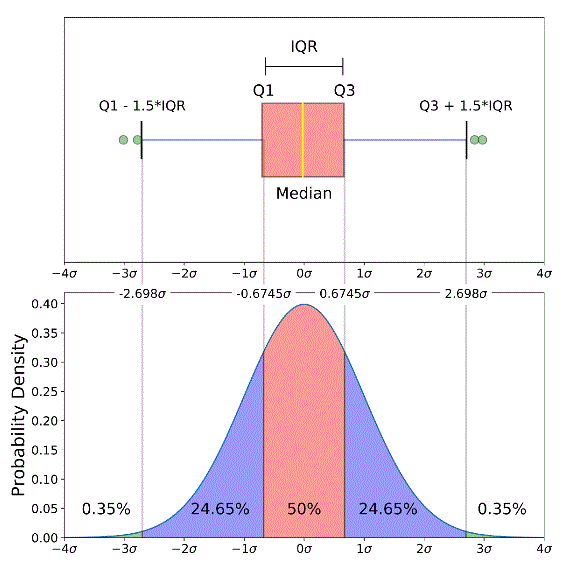
  
** 68–95–99.7 rule ** 
 
outliers are the remaining .7% percent of the data.
  
(1) variability 


In [34]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


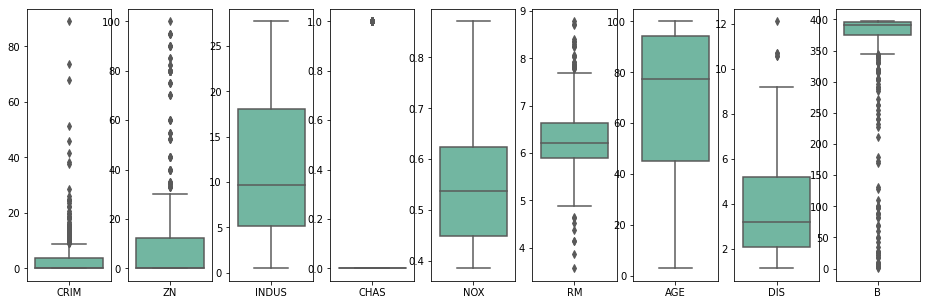

In [35]:
fig, (axes) = plt.subplots(nrows=1, ncols=9, figsize=(16, 5))

sns.boxplot(data=boston_df[['CRIM']],  palette='Set2', ax=axes[0]);
sns.boxplot(data=boston_df[['ZN']]  ,  palette='Set2', ax=axes[1]);
sns.boxplot(data=boston_df[['INDUS']], palette='Set2', ax=axes[2]);
sns.boxplot(data=boston_df[['CHAS']],  palette='Set2', ax=axes[3]);

sns.boxplot(data=boston_df[['NOX']],   palette='Set2', ax=axes[4]);
sns.boxplot(data=boston_df[['RM']]  ,  palette='Set2', ax=axes[5]);
sns.boxplot(data=boston_df[['AGE']],   palette='Set2', ax=axes[6]);
sns.boxplot(data=boston_df[['DIS']],   palette='Set2', ax=axes[7]);
sns.boxplot(data=boston_df[['B']],     palette='Set2', ax=axes[8]);

In [36]:
boston_df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [37]:
# fig, axes = plt.subplots(ncols=9, figsize=(16, 5))
# n = 2

# sns.swarmplot(data=boston_df[['CRIM']],  palette='Set2', ax=axes[0], size=n);
# sns.swarmplot(data=boston_df[['ZN']]  ,  palette='Set2', ax=axes[1], size=n);
# sns.swarmplot(data=boston_df[['INDUS']], palette='Set2', ax=axes[2], size=n);
# sns.swarmplot(data=boston_df[['CHAS']],  palette='Set2', ax=axes[3], size=n);

# sns.swarmplot(data=boston_df[['NOX']],   palette='Set2', ax=axes[4], size=n);
# sns.swarmplot(data=boston_df[['RM']]  ,  palette='Set2', ax=axes[5], size=n);
# sns.swarmplot(data=boston_df[['AGE']],   palette='Set2', ax=axes[6], size=n);
# sns.swarmplot(data=boston_df[['DIS']],   palette='Set2', ax=axes[7], size=n);
# sns.swarmplot(data=boston_df[['B']],     palette='Set2', ax=axes[8], size=n);

## Scatter plot-

In [38]:
# sns.pairplot(data=boston_df[['INDUS', 'TAX', 'AGE', 'RM' ]], height=3, diag_kind='kde');

## Using Z-score method
The intuition behind Z-score is to describe any data point by finding their relationship with the Standard Deviation and Mean of the group of data points. Z-score is finding the distribution of data where mean is 0 and standard deviation is 1 i.e. normal distribution.

In most of the cases a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.

In [39]:
from scipy import stats

In [40]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [41]:
z = np.abs(stats.zscore(boston_df))

In [42]:
boston_df.shape, z.shape

((506, 13), (506, 13))

In [43]:
z

array([[0.41978194, 0.28482986, 1.2879095 , 0.27259857, 0.14421743,
        0.41367189, 0.12001342, 0.1402136 , 0.98284286, 0.66660821,
        1.45900038, 0.44105193, 1.0755623 ],
       [0.41733926, 0.48772236, 0.59338101, 0.27259857, 0.74026221,
        0.19427445, 0.36716642, 0.55715988, 0.8678825 , 0.98732948,
        0.30309415, 0.44105193, 0.49243937],
       [0.41734159, 0.48772236, 0.59338101, 0.27259857, 0.74026221,
        1.28271368, 0.26581176, 0.55715988, 0.8678825 , 0.98732948,
        0.30309415, 0.39642699, 1.2087274 ],
       [0.41675042, 0.48772236, 1.30687771, 0.27259857, 0.83528384,
        1.01630251, 0.80988851, 1.07773662, 0.75292215, 1.10611514,
        0.1130321 , 0.41616284, 1.36151682],
       [0.41248185, 0.48772236, 1.30687771, 0.27259857, 0.83528384,
        1.22857665, 0.51117971, 1.07773662, 0.75292215, 1.10611514,
        0.1130321 , 0.44105193, 1.02650148],
       [0.41704368, 0.48772236, 1.30687771, 0.27259857, 0.83528384,
        0.20709638, 0.35115

In [44]:
threshold = 3

result = np.where(z > 3)
result

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
        200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, ...,
        414, 414, 415, 416, 418, 418, 419, 423, 424, 425, 426, 427, 427,
        429, 431, 436, 437, 438, 445, 450, 454, 455, 456, 457, 466],
       dtype=int64),
 array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
         1,  3,  3,  3,  3,  3,  3,  3, ...,  0, 12, 11, 11,  0, 11, 11,
        11, 11, 11, 11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
        11], dtype=int64))

In [45]:
len(result[0]), len(result[1])

(100, 100)

In [46]:
outlier_df = pd.DataFrame(data=result[0], columns=['ROWNUM'])

outlier_df['COLNUM'] = result[1]
outlier_df.head()

,ROWNUM,COLNUM
0,55,1
1,56,1
2,57,1
3,102,11
4,141,12


In [47]:
outlier_df.COLNUM.value_counts()

3     35
11    25
1     14
0      8
5      8
7      5
12     5
Name: COLNUM, dtype: int64

In [48]:
columns = boston_df.columns
columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [49]:
outlier_df['COLNAME'] = columns[outlier_df.COLNUM]
outlier_df.head()

,ROWNUM,COLNUM,COLNAME
0,55,1,ZN
1,56,1,ZN
2,57,1,ZN
3,102,11,B
4,141,12,LSTAT


In [50]:
for colname in outlier_df.COLNAME.unique():
    # get the rows from the main boston_df 
    outliers_rows = boston_df.loc[outlier_df.loc[outlier_df.COLNAME==colname, 'ROWNUM']]
    
    print(outliers_rows)

        CRIM     ZN  INDUS  CHAS     NOX     RM   AGE      DIS  RAD    TAX  \
55   0.01311   90.0   1.22   0.0  0.4030  7.249  21.9   8.6966  5.0  226.0   
56   0.02055   85.0   0.74   0.0  0.4100  6.383  35.7   9.1876  2.0  313.0   
57   0.01432  100.0   1.32   0.0  0.4110  6.816  40.5   8.3248  5.0  256.0   
199  0.03150   95.0   1.47   0.0  0.4030  6.975  15.3   7.6534  3.0  402.0   
200  0.01778   95.0   1.47   0.0  0.4030  7.135  13.9   7.6534  3.0  402.0   
201  0.03445   82.5   2.03   0.0  0.4150  6.162  38.4   6.2700  2.0  348.0   
202  0.02177   82.5   2.03   0.0  0.4150  7.610  15.7   6.2700  2.0  348.0   
203  0.03510   95.0   2.68   0.0  0.4161  7.853  33.2   5.1180  4.0  224.0   
204  0.02009   95.0   2.68   0.0  0.4161  8.034  31.9   5.1180  4.0  224.0   
256  0.01538   90.0   3.75   0.0  0.3940  7.454  34.2   6.3361  3.0  244.0   
283  0.01501   90.0   1.21   1.0  0.4010  7.923  24.8   5.8850  1.0  198.0   
284  0.00906   90.0   2.97   0.0  0.4000  7.088  20.8   7.3073  

## IQR score -

Observations below Q1- 1.5 IQR, or those above Q3 + 1.5IQR are defined as outliers.

In [51]:
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)

IQR = Q3 - Q1
print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
dtype: float64


we will get IQR for each column.

In [52]:
boston_df.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


get outlier row indexes for CRIM col

In [53]:
col_name = 'CRIM'
low  = Q1[col_name] - 1.5 * IQR[col_name]
high = Q3[col_name] + 1.5 * IQR[col_name]

low, high

(-5.31051125, 9.06963875)

In [54]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
query_string = '{} < @low or {} > @high'.format(col_name, col_name)

outlier_arr1 = boston_df.query(query_string).index
outlier_arr1

Int64Index([367, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384,
            385, 386, 387, 388, 392, 394, 398, 399, 400, 401, 402, 403, 404,
            405, 406, 407, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418,
            419, 420, 422, 425, 426, 427, 429, 431, 434, 435, 436, 437, 438,
            439, 440, 441, 443, 444, 445, 447, 448, 454, 468, 469, 477, 478,
            479],
           dtype='int64')

In [55]:
xdf = pd.DataFrame(boston_df.query(query_string)['CRIM'], columns=['col_val'])
xdf['outlier_pos'] = 'low'
xdf['col_name'] = 'CRIM'

In [56]:
xdf.head(10)

,col_val,outlier_pos,col_name


get outlier row indexes for ZN col

In [57]:
col_name = 'ZN'
low  = Q1[col_name] - 1.5 * IQR[col_name]
high = Q3[col_name] + 1.5 * IQR[col_name]

low, high

(-18.75, 31.25)

In [58]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
query_string = '{} < @low or {} > @high'.format(col_name, col_name)

outlier_arr2 = boston_df.query(query_string).index
outlier_arr2

Int64Index([ 39,  40,  54,  55,  56,  57,  65,  66, 187, 188, 189, 190, 191,
            192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
            254, 255, 256, 274, 275, 276, 277, 278, 283, 284, 285, 286, 287,
            288, 289, 290, 291, 292, 298, 299, 300, 301, 302, 303, 304, 305,
            306, 307, 331, 332, 341, 343, 344, 347, 348, 349, 350, 351, 352,
            353, 354, 355],
           dtype='int64')

In [59]:
outlier_arr1.union(outlier_arr2)

Int64Index([ 39,  40,  54,  55,  56,  57,  65,  66, 187, 188,
            ...
            444, 445, 447, 448, 454, 468, 469, 477, 478, 479],
           dtype='int64', length=134)

get outlier row indexes for all cols

In [60]:
init = False

for col_name in list(boston_df.columns):

    low  = Q1[col_name] - 1.5 * IQR[col_name]
    high = Q3[col_name] + 1.5 * IQR[col_name]

    query_string = '{} < @low or {} > @high'.format(col_name, col_name)

    outlier_arr_loop = boston_df.query(query_string).index
    
    if not init:
        outlier_arr = outlier_arr_loop
        init = True
    
    outlier_arr = outlier_arr.union(outlier_arr_loop)

In [61]:
len(outlier_arr)

232

In [62]:
boston_df.iloc[outlier_arr].head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
18,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69
25,0.84054,0.0,8.14,0.0,0.538,5.599,85.7,4.4546,4.0,307.0,21.0,303.42,16.51
27,0.95577,0.0,8.14,0.0,0.538,6.047,88.8,4.4534,4.0,307.0,21.0,306.38,17.28
32,1.38799,0.0,8.14,0.0,0.538,5.950,82.0,3.9900,4.0,307.0,21.0,232.60,27.71
34,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
39,0.02763,75.0,2.95,0.0,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98
54,0.01360,75.0,4.00,0.0,0.410,5.888,47.6,7.3197,3.0,469.0,21.1,396.90,14.80
55,0.01311,90.0,1.22,0.0,0.403,7.249,21.9,8.6966,5.0,226.0,17.9,395.93,4.81
56,0.02055,85.0,0.74,0.0,0.410,6.383,35.7,9.1876,2.0,313.0,17.3,396.90,5.77


#### Deeper outlier analysis

In [63]:
init = False
outliers_arr_low  = pd.DataFrame()
outliers_arr_high = pd.DataFrame()

outliers_arr      = pd.DataFrame(columns=['col_val', 'outlier_pos', 'outlier_val', 'col_name'])

for col_name in list(boston_df.columns):

    low  = Q1[col_name] - 1.5 * IQR[col_name]
    high = Q3[col_name] + 1.5 * IQR[col_name]

    query_string_low  = '{} < @low'.format(col_name)
    query_string_high = '{} > @high'.format(col_name)
    
    # below low outliers     
    outliers_arr_low = pd.DataFrame(boston_df.query(query_string_low)[col_name])
    # , columns=['col_val']
    outliers_arr_low['outlier_pos'] = 'low'
    outliers_arr_low['outlier_val'] = low
    outliers_arr_low['col_name']    = col_name
  
    # above high outliers
    outliers_arr_high = pd.DataFrame(boston_df.query(query_string_high)[col_name])
    # , columns=['col_val']
    outliers_arr_high['outlier_pos'] = 'high'
    outliers_arr_high['outlier_val'] = high
    outliers_arr_high['col_name']    = col_name
    
#     if outliers_arr.empty:
#         outliers_arr = outliers_arr_low.copy()
#     else:
    outliers_arr = pd.concat([outliers_arr, outliers_arr_low], ignore_index=False)
    
    outliers_arr = pd.concat([outliers_arr, outliers_arr_high], ignore_index=False ) 

In [64]:
outliers_arr

,col_val,outlier_pos,outlier_val,col_name,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
367,NaN,high,9.069639,CRIM,13.5222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
371,NaN,high,9.069639,CRIM,9.2323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,NaN,high,9.069639,CRIM,11.1081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,NaN,high,9.069639,CRIM,18.4982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
375,NaN,high,9.069639,CRIM,19.6091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,NaN,high,31.962500,LSTAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.97
387,NaN,high,31.962500,LSTAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.99
412,NaN,high,31.962500,LSTAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.37
414,NaN,high,31.962500,LSTAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.98


# Example 2

#### Parametric methods: Univariate
Create a dummy dataframe where features have normal distributions to practice parametric methods.

In [65]:
# seed for reproducibility
np.random.seed(42)

n_feats=4

# dummydf = pd.DataFrame(np.random.normal(scale=10.0, size=(1000, n_feats)),
#                        columns=['feature{}'.format(i) for i in range(n_feats)])

dummydf = pd.DataFrame(np.random.normal(scale=10.0, 
                                        size=(1000, n_feats)),
                       columns=['feature0', 'feature1', 'feature3', 'features4' ])

In [66]:
dummydf.head(5)

,feature0,feature1,feature3,features4
0,4.967142,-1.382643,6.476885,15.230299
1,-2.341534,-2.341370,15.792128,7.674347
2,-4.694744,5.425600,-4.634177,-4.657298
3,2.419623,-19.132802,-17.249178,-5.622875
4,-10.128311,3.142473,-9.080241,-14.123037


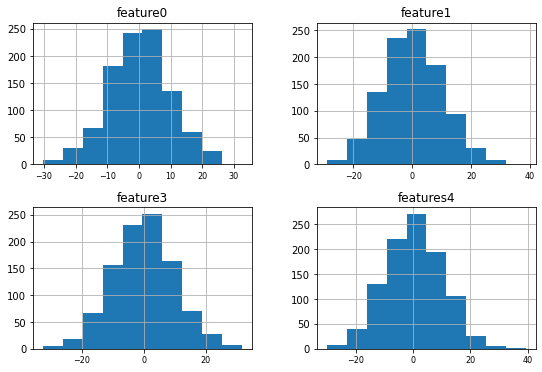

In [67]:
# all normally distributed
dummydf.hist(figsize=(9,6), xlabelsize = 8);

In [68]:
# # enough variation between features to show outliers
dummydf.describe()

,feature0,feature1,feature3,features4
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.306239,0.248285,-0.082552,0.300861
std,9.639191,10.118843,10.060754,10.069640
min,-30.195122,-28.962554,-32.412673,-29.911360
25%,-6.129422,-6.770368,-6.752986,-6.708710
50%,0.561874,0.202097,-0.075088,0.211577
75%,6.648813,6.938808,6.422820,6.958780
max,32.430930,38.527315,31.520567,39.262377


#### Define two functions that statistically identify outliers in a pandas Series using a standard deviation and interquartile range method.

In [69]:
def out_std(s, nstd=3.0):
    # , return_thresholds=False
    
    """
    Return a boolean mask of outliers for a series
    using standard deviation, works column-wise.
    
    param nstd:
        Set number of standard deviations from the mean to consider an outlier
        :type nstd: ``float``
    
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
        :type return_thresholds: ``bool``
    """
    data_mean, data_std = s.mean(), s.std()
    
    cut_off = data_std * nstd
    
    lower, upper = data_mean - cut_off, data_mean + cut_off
    
#     if return_thresholds:
#         return lower, upper
#     else:
#         return [True if x < lower or x > upper else False for x in s]
    return lower, upper, [True if x < lower or x > upper else False for x in s]

In [70]:
def out_iqr(s, k=1.5, return_thresholds=False):
    """
    Return a boolean mask of outliers for a series
    using interquartile range, works column-wise.
    param k:
        some cutoff to multiply by the iqr
    :type k: ``float``
    param return_thresholds:
        True returns the lower and upper bounds, good for plotting.
        False returns the masked array 
    :type return_thresholds: ``bool``
    """
    # calculate interquartile range
    q25, q75 = np.percentile(s, 25), np.percentile(s, 75)
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    
    if return_thresholds:
        return lower, upper
    else: # identify outliers
        return [True if x < lower or x > upper else False for x in s]

#### Standard Deviation method

In [71]:
# outlier_mask is a boolean list identifies the indices of the outliers
lower, upper, outlier_mask = out_std(dummydf['feature0'], nstd=3)

# first 10 elements
print(lower, upper)
outlier_mask[:10]

-28.611334931388793 29.223813199865955


[False, False, False, False, False, False, False, False, False, False]

In [72]:
# get all the outlier data

#dummydf['feature0'][outlier_mask]
dummydf.loc[outlier_mask, ['feature0']]

,feature0
506,-30.195122
788,-29.069882
929,32.430930


In [73]:
# python list gets the first index
outlier_mask.index(True)

506

In [74]:
# convert the outlier_mask to numpy array
np_outlier_mask = np.array(outlier_mask)

np.where(np_outlier_mask == True)

(array([506, 788, 929], dtype=int64),)

C:\Users\pogupt\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


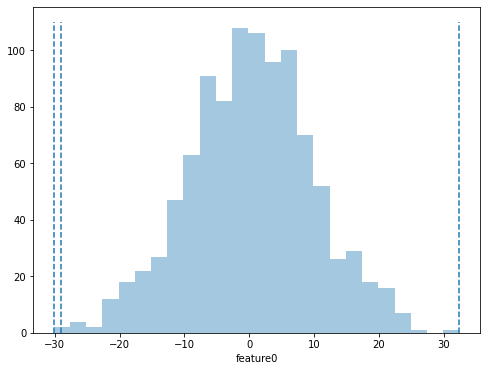

In [75]:
plt.figure(figsize=(8,6))
sns.distplot(dummydf['feature0'], kde=False);
plt.vlines(dummydf['feature0'][outlier_mask], ymin=0, ymax=110, linestyles='dashed');